In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.optim import lr_scheduler
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## ****setting the mean and standard-div for normalization of dataset****

In [3]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

## ****Transforming the dataset by resizing and normalizing****

In [4]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

## ****splitting the dataset into train and validations****

In [5]:
train_df = "../input/dog-vs-cat-fastai/dogscats/train/"
val_df = "../input/dog-vs-cat-fastai/dogscats/valid/"

batch_size = 8
num_workers = 4

## ****** Dataloader for training dataset ******

In [6]:
train_data = datasets.ImageFolder(root=train_df, transform=train_transforms)
train_data

Dataset ImageFolder
    Number of datapoints: 23000
    Root location: ../input/dog-vs-cat-fastai/dogscats/train/
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [7]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

## ****DataLoader for Validation ****

In [8]:
val_data = datasets.ImageFolder(root=val_df, transform=val_transforms)
val_data

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: ../input/dog-vs-cat-fastai/dogscats/valid/
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [9]:
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

In [10]:
dataloaders = {
    "train": train_loader,
    "valid": val_loader
}

In [11]:
total_batch_sizes = {"train":len(train_loader), "valid":len(val_loader)}
total_batch_sizes

{'train': 2875, 'valid': 250}

## ****Checking the classes of dataset****

In [12]:
class_names = train_data.classes
print(class_names)

['cats', 'dogs']


## ******Helper function to show the name and title of the image ******

In [13]:
def imshow(inp, title):
    inp = inp.cpu().numpy().transpose((1,2,0))
    inp = std * inp +mean
    inp = np.clip(inp, 0, 1)
    
    plt.figure (figsize=(24, 12))
    plt.imshow(inp)
    plt.title(title)
    plt.pause(3)

In [14]:
inputs, classes = next(iter(dataloaders['train']))

In [15]:
out = torchvision.utils.make_grid(inputs)

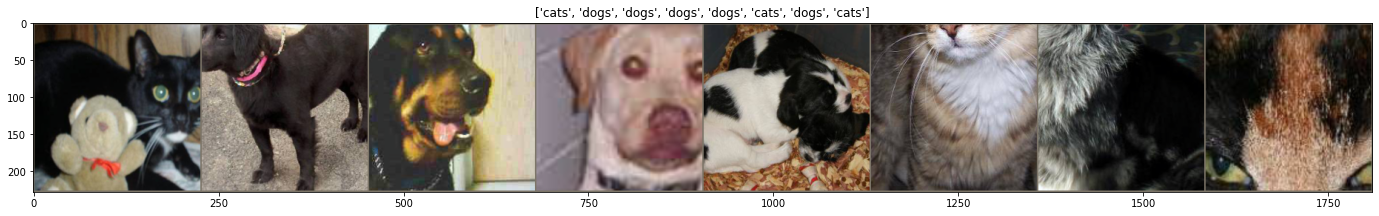

In [16]:
imshow(out, title=[class_names[x] for x in classes])

In [17]:
from torchvision import models

## ****Using the VGG16 model to retrain the transfer learning model****

In [18]:
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [19]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 

## ****checking the number of features classifies****

In [20]:
num_fits = model.classifier[6].in_features
num_fits

4096

## ******Checking the output of the classify features******

In [21]:
model.classifier[6].out_features

1000

## ******classifying the ouput into 2(cat or dog) instead of initial 1000 in other for the model to properly classify our dataset correctly******

In [22]:
for param in model.parameters():
    param.requires_grad =False

In [23]:
model.classifier[6] = nn.Linear(num_fits, 2)

In [24]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## ****** pretraining the model with already set parameters since the classifier is linear therefore we are going to be using the crossentropyloss ******

In [31]:
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

## **** function for training the model****

In [32]:
def train_model(model, criterion, optimixer, scheduler, num_epochs=25):
    model = model.to(device)
    
    best_acc =0.0
    best_model_wts = copy.deepcopy(model.state_dict())
    
    for epochs in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('_', * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()
                
            else:
                model.eval()
                
            running_loss = 0.0
            running_correct = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs
                labels = inputs
                
                optimizer.zero_grad()
                
                with torch.set_grad_enable(phase == "train"):
                    
                    outputs = model(inputs)
                    
                    _, preds = torch.max(outputs, 1)
                    
                    loss = criterion(outputs, labels)
                    
                    if phase == "train":
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
                epoch_loss = running_loss/total_batch_sizes[phase]
                epoch_acc = running_corrects.double() / (total_batch_sizes(phase) * batch_size)
                
                print('{} loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
                
                if phase == 'test' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    
    print('training complete')
    print('best val acc: {:.4f}'.format(best_acc))
    
    model.load_state_dict(best_model_wts)
    
    return model
                
                

In [34]:
model = train_model(model, optimizer_ft, exp_lr_scheduler, scheduler, num_epochs=5)

In [ ]:
model.eval()

In [ ]:
with torch.no_grad():
    
    correct =0
    total = 0
    
    for images, labels in dataloaders['test']:
        images = images
        labesls = labels
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy of the model on the test images: {}%'.format(100 * correct/total))
    